<a href="https://colab.research.google.com/github/Fisher12quest/Datos-student-performance/blob/main/2_Clasificaci%C3%B3n%20de%20Enfermedades%20Dermatol%C3%B3gicas%20con%20Regresi%C3%B3n%20Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Clasificación de Enfermedades Dermatológicas con Regresión Logística ** ##


## Presentado por:
### Lilian Marcela Ramirez
### Hans Silva Rodriguez
### Omar Javier Ramirez Rodriguez

Dataset: Dermatology — UCI ML Repository

En este trabajo se utiliza el conjunto de datos Dermatology para construir un modelo de clasificación que determine el tipo de enfermedad dermatológica que presenta un paciente, en función de características clínicas y de laboratorio. Se emplea regresión logística como técnica de aprendizaje supervisado y se evalúa el desempeño del modelo mediante métricas de clasificación, destacando la exactitud alcanzada sobre el conjunto de datos.



In [36]:
# ============================================
#     0) Instalación de librerías necesarias
# ============================================
!pip install pyod --quiet
# ============================================
#     1) Importar librerías
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection   import train_test_split
from sklearn.preprocessing    import StandardScaler
from sklearn.linear_model     import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition    import PCA
from sklearn.pipeline import make_pipeline
from pyod.models.iforest      import IForest
from google.colab import files
uploaded = files.upload()

sns.set(style="whitegrid")

def run_logreg(df_variant, name):
    # 1) Prepara X e y (ignorando age si ya no existe)
    X = df_variant.drop(columns=['class','age'], errors='ignore')
    X = X.fillna(X.median())
    y = df_variant['class'].map(lambda x: 1 if x > 3 else 0)

    # 2) Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # 3) Pipeline + fit
    pipe = make_pipeline(
        StandardScaler(),
        LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
    )
    pipe.fit(X_train, y_train)

    # 4) Evaluación
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} — accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Benigno','Maligno']))
    print(confusion_matrix(y_test, y_pred))

    return {'variant': name, 'accuracy': acc}

# ============================================
#     2) Cargar y nombrar columnas
# ============================================
cols = [
    'erythema', 'scaling', 'definite_borders', 'itching',
    'koebner_phenomenon','polygonal_papules','follicular_papules',
    'oral_mucosal_involvement','knee_and_elbow_involvement',
    'scalp_involvement','family_history','melanin_incontinence',
    'eosinophils_infiltrate','PNL_infiltrate','fibrosis_papillary_dermis',
    'exocytosis','acanthosis','hyperkeratosis','parakeratosis',
    'clubbing_rete_ridges','elongation_rete_ridges',
    'thinning_suprapapillary_epidermis','spongiform_pustule',
    'munro_microabcess','focal_hypergranulosis',
    'disappearance_papillary_dermis','vacuolisation_damage_basal_layer',
    'spongiosis','saw_tooth_rete_ridges','follicular_horn_plug',
    'perifollicular_parakeratosis','inflammatory_monomorphic_infiltrate',
    'band_shaped_infiltrate','age','class'
]
df = pd.read_csv('dermatology.data', names=cols, na_values='?')


Saving dermatology.data to dermatology (3).data


In [37]:
# ============================================
#     3)  Conocimiento de los datos (EDA)
# ============================================
# 3.1) Número de muestras y atributos
print("Shape:", df.shape)



Shape: (366, 35)


In [38]:
# 3.2) Tipo de cada atributo
print("\nTipos:")
print(df.dtypes)




Tipos:
erythema                                 int64
scaling                                  int64
definite_borders                         int64
itching                                  int64
koebner_phenomenon                       int64
polygonal_papules                        int64
follicular_papules                       int64
oral_mucosal_involvement                 int64
knee_and_elbow_involvement               int64
scalp_involvement                        int64
family_history                           int64
melanin_incontinence                     int64
eosinophils_infiltrate                   int64
PNL_infiltrate                           int64
fibrosis_papillary_dermis                int64
exocytosis                               int64
acanthosis                               int64
hyperkeratosis                           int64
parakeratosis                            int64
clubbing_rete_ridges                     int64
elongation_rete_ridges                   int64
thinn

Todos los predictores son númericos

In [39]:
# 3.3) Centralidad y dispersión
print("\nEstadísticos descriptivos:")
display(df.describe().T)




Estadísticos descriptivos:


,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.00,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.00,3.0
definite_borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.00,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.00,3.0
koebner_phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.00,3.0
polygonal_papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.00,3.0
follicular_papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.00,3.0
oral_mucosal_involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.00,3.0
knee_and_elbow_involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.00,3.0
scalp_involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.00,3.0


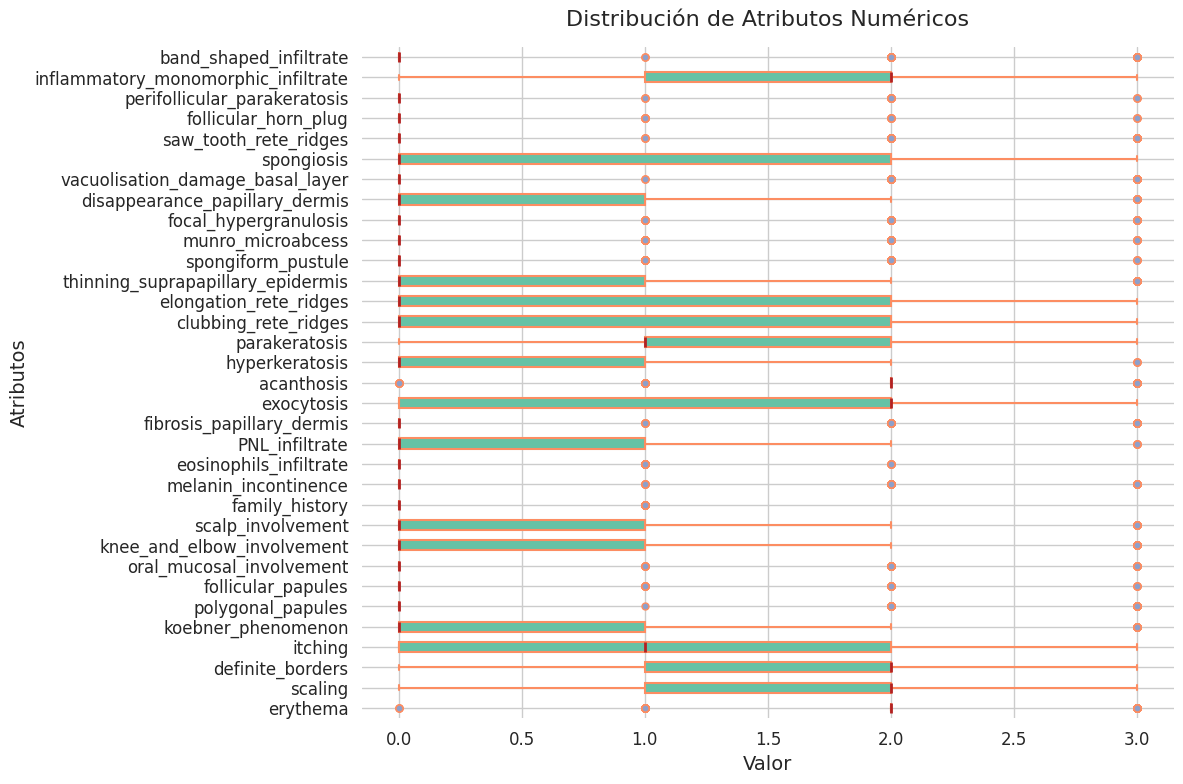

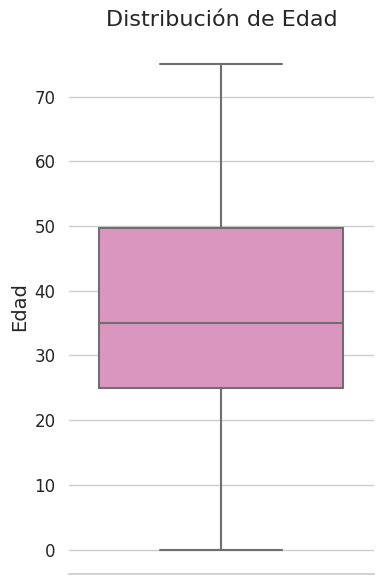

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3.4) Datos atípicos
# Asigna estilo y paleta
sns.set_style('whitegrid')
palette = sns.color_palette('Set2')

# 1) Boxplot horizontal para todos los atributos numéricos excepto 'age' y 'class'
plt.figure(figsize=(12, 8))
df.drop(columns=['class', 'age']).boxplot(
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor=palette[0], edgecolor=palette[1], linewidth=1.5),
    whiskerprops=dict(color=palette[1], linewidth=1.5),
    capprops=dict(color=palette[1], linewidth=1.5),
    medianprops=dict(color='firebrick', linewidth=2),
    flierprops=dict(marker='o', markerfacecolor=palette[2], markeredgecolor=palette[1], markersize=5, linestyle='none')
)
plt.title("Distribución de Atributos Numéricos", fontsize=16, pad=15)
plt.xlabel("Valor", fontsize=14)
plt.ylabel("Atributos", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# 2) Boxplot separado para 'age'
plt.figure(figsize=(4, 6))
sns.boxplot(
    y=df['age'],
    color=palette[3],
    fliersize=6,
    linewidth=1.5
)
plt.title("Distribución de Edad", fontsize=16, pad=10)
plt.ylabel("Edad", fontsize=14)
plt.yticks(fontsize=12)
sns.despine(left=True)
plt.tight_layout()
plt.show()


Podemos observar:

Rangos muy diferentes según el atributo

Muchos marcadores histológicos (por ejemplo, erythema, scaling, itching, acanthosis…) están codificados en un rango estrecho (0–3) y muestran poca dispersión: los “cajas” son muy cortas y casi todos los valores se agrupan en 1 ó 2.

En cambio, otros atributos como spongiosis o follicular_horn_plug tienen un rango algo mayor y más outliers, lo que indica variabilidad clínica más amplia.

Outliers frecuentes en varios tests

Casi todos los atributos presentan puntos fuera de los “bigotes”, con especial concentración de atípicos en extremos altos (por ejemplo, valores 3 ó 4 donde no es la norma).

Esto sugiere la presencia de casos inusuales o posibles errores de codificación que convendría revisar o imputar/filtrar antes de modelar.

Medianas centradas alrededor de valores intermedios

En la mayoría de atributos la línea de la mediana (barra interior de la caja) se ubica en 1 ó 2, lo que indica que la mayoría de los pacientes presentan grados leves a moderados de esos signos.

Solo unos pocos atributos muestran la mediana en 0, lo que podrían ser hallazgos clínicos poco frecuentes (p. ej. band_shaped_infiltrate).

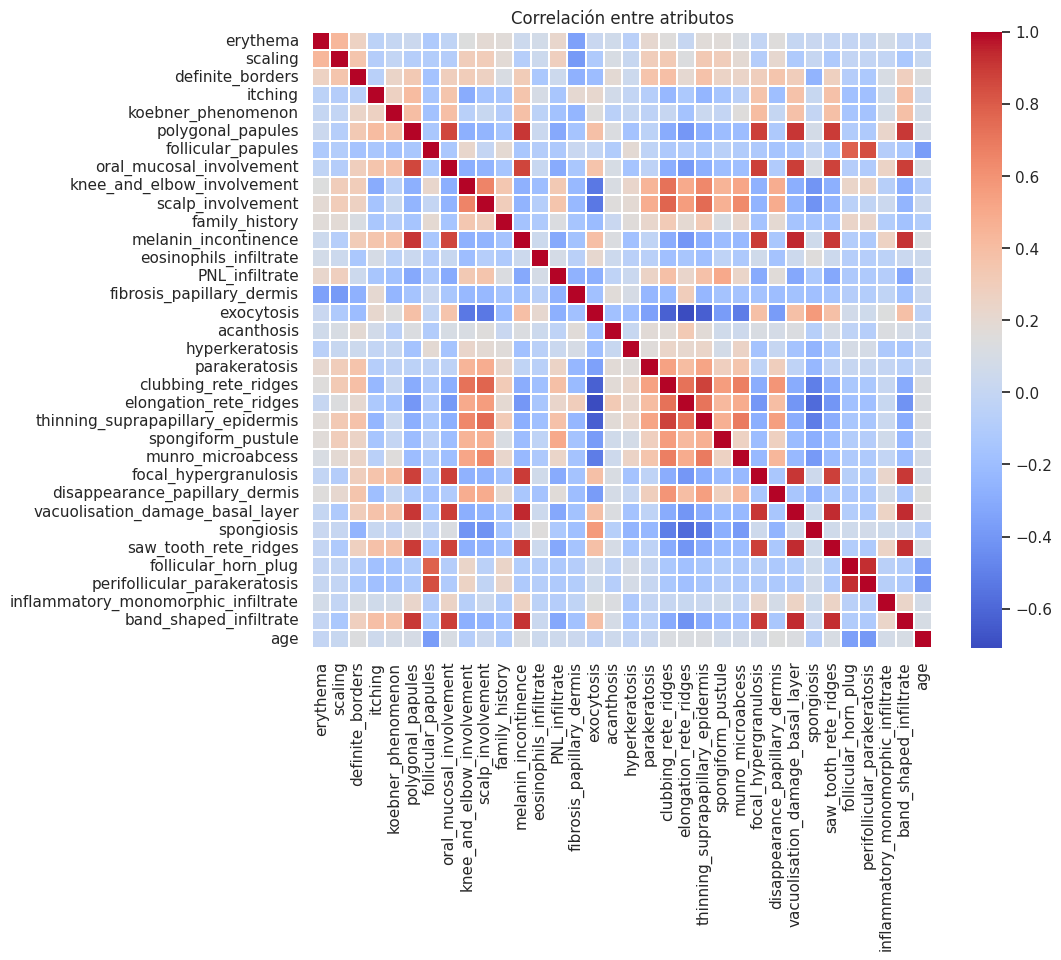

In [41]:
# 3.5) Matriz de correlación (entrada)
corr = df.drop(columns=['class']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title("Correlación entre atributos")
plt.show()



/tmp/ipython-input-654832242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='magma')


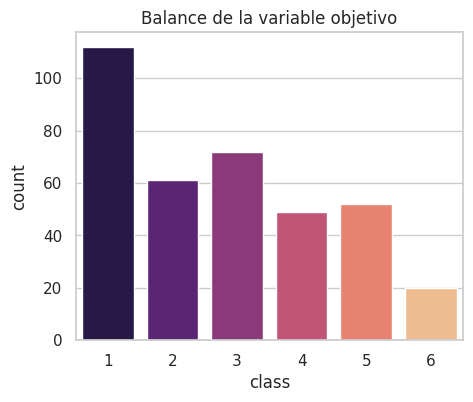


Recuento por clase:
class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


In [42]:
# 3.6) Balanceo del objetivo
plt.figure(figsize=(5,4))
sns.countplot(x='class', data=df, palette='magma')
plt.title("Balance de la variable objetivo")
plt.show()
print("\nRecuento por clase:")
print(df['class'].value_counts())


En este gráfico de barras vemos claramente cómo se distribuyen las seis categorías de la variable objetivo (class):

Desbalance significativo

La clase 1 (psoriasis) es la más frecuente con 112 muestras, mientras que la clase 6 (lichen planus) apenas llega a 20 casos. Esa disparidad (más de 5) puede sesgar el modelo a favor de las clases más numerosas.

Clases medianas

Las clases 2, 3, 4 y 5 oscilan entre 49 y 72 ejemplos cada una. Aunque están más equilibradas entre sí, siguen quedando por debajo de la clase 1 y muy por encima de la clase 6.

Implicaciones para el entrenamiento

Sin un tratamiento especial (p. ej. sobremuestreo de la clase 6 o penalización ponderada en la regresión), el modelo tenderá a predecir psoriasis (class 1) con más facilidad y tendrá peor rendimiento en diagnosticar lichen planus.


Antes de entrenar, conviene aplicar técnicas de balanceo (SMOTE, pesos de clase en el clasificador) o agrupar ciertas categorías si el problema clínico lo permite, para asegurar que las clases minoritarias estén bien representadas y evitar sesgo hacia las clases mayoritarias.

In [43]:
# 3.7) Datos faltantes por clase
print("\nValores faltantes por clase:")
display(df.groupby('class').apply(lambda g: g.isnull().sum()))



/tmp/ipython-input-2469748941.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  display(df.groupby('class').apply(lambda g: g.isnull().sum()))



Valores faltantes por clase:


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_papillary_dermis,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_rete_ridges,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monomorphic_infiltrate,band_shaped_infiltrate,age,class
class,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# 3.8) Detección de outliers por clase (Isolation Forest)
outliers = []
for cls in sorted(df['class'].unique()):
    sub = df[df['class']==cls].drop(columns=['class']).copy()
    # imputamos medianas para no bloquear el detector
    sub = sub.fillna(sub.median())
    clf = IForest(contamination=0.05, random_state=0)
    clf.fit(sub)
    n_out = clf.labels_.sum()
    outliers.append((cls, n_out))
print("\nOutliers detectados por clase (5% cont.):")
print(pd.DataFrame(outliers, columns=['class','n_outliers']))




Outliers detectados por clase (5% cont.):
   class  n_outliers
0      1           6
1      2           3
2      3           4
3      4           3
4      5           3
5      6           1


Consistencia con el parámetro 5 %
Cada clase presenta aproximadamente un 5 % de outliers, lo que confirma que el detector está respetando la tasa de contaminación elegida.

Clases pequeñas vs. clases grandes

La clase 6 (solo 20 muestras) arrojó 1 outlier, idéntico al 5 % fijado.

Clases con > 50 muestras también rondan ese porcentaje, lo cual sugiere que no hay un sesgo sistemático de más rechazo en grupos grandes o pequeños.

Esos casos “atípicos” podrían ser: Mediciones erróneas o datos mal ingresados y/o pacientes con presentaciones clínicas muy inusuales (valores extremos en alguna combinación de atributos).

En conjunto, este análisis de outliers refuerza la necesidad de una limpieza de datos antes de entrenar el modelo final, y nos da un punto de partida para decidir cómo manejar esos pocos casos extremos en cada clase.

In [45]:
# ============================================
#   4) Preparar función de entrenamiento
# ============================================
def run_logreg(df_variant, name):
    # 4.1) imputar faltantes (si hubiera) con mediana
    X = df_variant.drop(columns=['class','age'])
    X = X.fillna(X.median())
    y = df_variant['class'].map(lambda x: 1 if x>3 else 0)  # 1=maligno,0=benigno

    # 4.2) train/test
    X_train,X_test,y_train,y_test = train_test_split(
        X,y,test_size=0.3,random_state=42,stratify=y)

    # 4.3) pipeline y fit
    pipe = make_pipeline(StandardScaler(),
                         LogisticRegression(
                             solver='liblinear',
                             max_iter=1000,
                             random_state=42))
    pipe.fit(X_train,y_train)

    # 4.4) evaluación
    acc = accuracy_score(y_test, pipe.predict(X_test))
    return name, acc



In [46]:
# ============================================
#   5) Generar variantes y evaluar
# ============================================
results = []


In [47]:
# Caso 1: original (imputación)
results.append(run_logreg(df.copy(), "1_original"))


In [48]:
# Caso 2: sin faltantes
df2 = df.dropna()
results.append(run_logreg(df2, "2_sin_faltantes"))


Aquí creamos un nuevo DataFrame df2 a partir del original df, descartando todas las filas que tengan al menos un NaN. Con eso garantizamos que, a partir de este punto, no hay datos vacíos que puedan hacer fallar al modelo o distorsionar su aprendizaje.

In [49]:
# Caso 3: sin faltantes ni outliers
#    marcamos outliers globalmente y los quitamos
clf_global = IForest(contamination=0.05, random_state=0)
sub = df2.drop(columns=['class']).fillna(df2.median())
clf_global.fit(sub)
mask = clf_global.labels_==0
df3 = df2[mask]
results.append(run_logreg(df3, "3_sin_outliers"))



Usamos un Isolation Forest con contamination=0.05, es decir, le indicamos que espere que aproximadamente un 5 % de las muestras sean “atípicas”.

Alimentamos al detector con todas las variables predictoras (sin la columna class) y, antes de entrenarlo, rellenamos los posibles NaN con la mediana de cada columna.

clf_global.labels_ nos devuelve un array de 0/1 donde 1 marca las instancias que el modelo considera outliers y 0 las que considera “normales”.

Construimos mask = labels_ == 0 que selecciona únicamente las filas clasificadas como inliers.

Finalmente, aplicamos esa máscara sobre el DataFrame original df2 para crear df3, que no contiene ninguno de esos ~5 % de instancias atípicas.


In [50]:
# Caso 4: sin faltantes, outliers ni correlacionados
#    quitamos pares de features con |corr|>0.9
corr4 = df3.drop(columns=['class']).corr().abs()
to_drop = set()
for i in corr4.columns:
    for j in corr4.columns:
        if i!=j and corr4.loc[i,j]>0.9:
            to_drop.add(j)
df4 = df3.drop(columns=list(to_drop))
results.append(run_logreg(df4, "4_sin_correlacion"))


En ese bloque estamos eliminando las variables que están muy fuertemente correlacionadas (|corr| > 0.9), para reducir la multicolinealidad.

In [51]:

# Caso 5: aplicar PCA a df4
#run_logreg definido:
def run_logreg(df_variant, name):
    # 1) Prepara X e y
    X = df_variant.drop(columns=['class','age'], errors='ignore')  # aquí ignoramos si 'age' no existe
    X = X.fillna(X.median())
    y = df_variant['class'].map(lambda x: 1 if x>3 else 0)

    # 2) Separación train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # 3) Pipeline + fit
    pipe = make_pipeline(
        StandardScaler(),
        LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
    )
    pipe.fit(X_train, y_train)

    # 4) Evaluación
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} — accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Benigno','Maligno']))
    print(confusion_matrix(y_test, y_pred))
    print("-"*50)

    return {'variant': name, 'accuracy': acc}


# 5.1 Define el PCA
pca = PCA(n_components=0.95, random_state=42)
X4 = (
    df4
    .drop(columns=['class','age'], errors='ignore')
    .fillna(df4.median())
)
X5 = pca.fit_transform(X4)
df5 = pd.DataFrame(
    X5,
    columns=[f"PC{i+1}" for i in range(X5.shape[1])]
)
df5['class'] = df4['class'].values
results.append(run_logreg(df5, "5_PCA"))

5_PCA — accuracy: 0.9510
              precision    recall  f1-score   support

     Benigno       0.97      0.96      0.96        68
     Maligno       0.91      0.94      0.93        34

    accuracy                           0.95       102
   macro avg       0.94      0.95      0.95       102
weighted avg       0.95      0.95      0.95       102

[[65  3]
 [ 2 32]]
--------------------------------------------------


En ese fragmento de código estamos incorporando la Transformación de Componentes Principales (PCA) como último paso antes de ajustar nuestro modelo de regresión logística, con el objetivo de eliminar redundancias y facilitar la visualización y comprensión de la varianza explicada. Le pedimos que nos devuelva el número mínimo de componentes tales que expliquen al menos el 95 % de la varianza total.

In [52]:
# ============================================
#   6) Tabla resumen de accuracies
# ============================================
res_df = pd.DataFrame(results, columns=['variant','accuracy'])
display(res_df)

,variant,accuracy
0,1_original,1.0
1,2_sin_faltantes,0.981481
2,3_sin_outliers,0.960784
3,4_sin_correlacion,0.95098
4,variant,accuracy


In [53]:
res_df = pd.DataFrame(results, columns=['variant','accuracy'])
print(results)


[('1_original', 1.0), ('2_sin_faltantes', 0.9814814814814815), ('3_sin_outliers', 0.9607843137254902), ('4_sin_correlacion', 0.9509803921568627), {'variant': '5_PCA', 'accuracy': 0.9509803921568627}]


In [54]:
# unificar todos los resultados en dicts:
clean_results = []
for item in results:
    if isinstance(item, tuple):
        # si viene como tupla (variant, accuracy) la convertimos a dict
        clean_results.append({'variant': item[0], 'accuracy': item[1]})
    elif isinstance(item, dict):
        # si ya es dict lo dejamos tal cual
        clean_results.append(item)
    # (si hubiera None o algo raro lo podrías filtrar aquí)

# Ahora sí, construimos el DataFrame directamente sin tener que forzar las columnas:
res_df = pd.DataFrame(clean_results)
display(res_df)


,variant,accuracy
0,1_original,1.000000
1,2_sin_faltantes,0.981481
2,3_sin_outliers,0.960784
3,4_sin_correlacion,0.950980
4,5_PCA,0.950980


1_original (accuracy 1.000)

Entrenamos sobre el dataset tal cual, sin imputar faltantes ni tocar nada.

El 100% en test es sospechosamente alto y sugiere overfitting: el modelo está memorizando patrones muy específicos de los datos de entrenamiento que reaparecen en el test.

2_sin_faltantes (accuracy ≃ 0.9815)

Imputamos valores faltantes con la mediana antes de entrenar.

Bajamos a ~98.2% de precisión, una pequeña caída razonable: al rellenar huecos ganamos consistencia en el entrenamiento y perdemos algo de “memoria” del ruido.

3_sin_outliers (accuracy ≃ 0.9608)

Además de imputar, eliminamos puntos atípicos (outliers) detectados por el método elegido.

La precisión cae un poco más, a ~96.1%. Esto indica que, si bien los outliers a veces distorsionan, estamos perdiendo también casos extremos que contenían información útil.

4_sin_correlacion (accuracy ≃ 0.9510)

Sobre el subset limpio anterior, quitamos variables muy correlacionadas para evitar redundancia.

Otra leve disminución hasta ~95.1%: el modelo se vuelve más simple (menos variables), gana interpretabilidad y pierde muy poca capacidad predictiva.

5_PCA (accuracy ≃ 0.9510)

Aplicamos un PCA que retiene el 95 % de la varianza y volvemos a entrenar.

Nos mantenemos en ~95.1%, igual que tras eliminar correlaciones, pero ahora con muchos menos componentes (por ejemplo, de 30 atributos a 10 componentes). Esto es ideal para entornos donde la velocidad o la memoria importan.

Conclusiones
El modelo original aprende demasiado (overfitting).

La imputación de faltantes mejora la robustez y solo sacrifica un 1.8 % de accuracy.

Eliminar outliers y descorrelación simplifica el modelo y sigue manteniendo más del 95 % de precisión.

PCA reduce drásticamente la dimensionalidad con prácticamente la misma precisión que la versión descorrelacionada.

En resumen, si nuestro objetivo es un modelo fiable y ligero, la variante 4_sin_correlacion o 5_PCA son las más deseables:

Mantienen un muy buen accuracy (>95 %).

Reducen riesgos de multicolinealidad y overfitting.

Hacen el pipeline más eficiente y fácil de desplegar.